## Text to number

In [1]:
# Download necessary NLTK data files
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

# Initialize stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# NLP preprocessing function
def preprocess_text(text):
    # Convert to lower case + Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words + Retain only English letters + Stem + Lemmatize
    processed_tokens = [
        lemmatizer.lemmatize(
            stemmer.stem(token))
        for token in tokens
            if token not in stop_words and re.findall('^[a-z]+$', token)
        ]

    # Convert a list of tokens to a long string
    return ' '.join(processed_tokens)

In [3]:
import os
from collections import defaultdict

data_dir = 'text' # Set directory to "text" folder
author_list = []  # Outcome (y) variable
preprocessed_corpus = []
# Dictionary, key is author (str), value is its all preprocessed contents (str)
author_content = defaultdict(str)

for filename in os.listdir(data_dir):  # List all files under the directory
    author = filename.split(' - ')[0]  # Split author name
    author_list.append(author)
    # Read .txt file
    with open(data_dir + os.sep + filename, 'r', encoding='utf-8') as file:
        content = file.read()
    preprocessed_text = preprocess_text(content)  # NLP preprocessing function
    preprocessed_corpus.append(preprocessed_text)
    author_content[author] += ' ' + preprocessed_text

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag-of-Words (BoW)
vectorizer_bow = CountVectorizer()
bow = vectorizer_bow.fit_transform(preprocessed_corpus)

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
tfidf = vectorizer_tfidf.fit_transform(preprocessed_corpus)

In [5]:
import pandas as pd

# Convert arrays to data frames
df_bow = pd.DataFrame(bow.toarray(), columns=vectorizer_bow.get_feature_names_out())
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
df_author = pd.DataFrame({'author_name': author_list})

# Export
df_bow.to_csv('data/bag-of-words.csv', index=False)
df_tfidf.to_csv('data/tf-idf.csv', index=False)
df_author.to_csv('data/author.csv', index=False)

## Word cloud

Austen, Jane


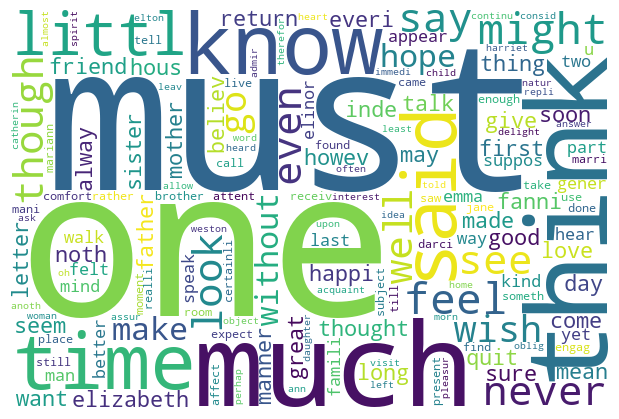

Christie, Agatha


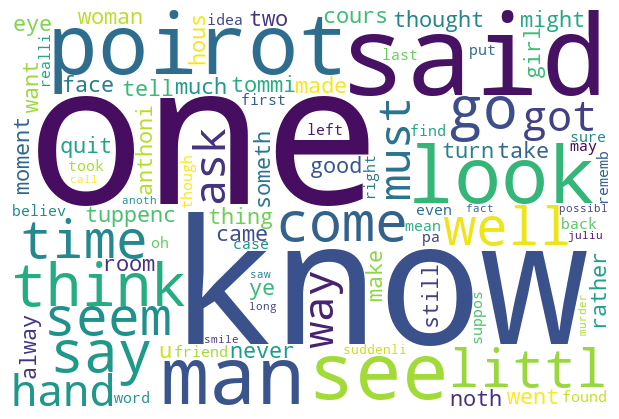

Defoe, Daniel


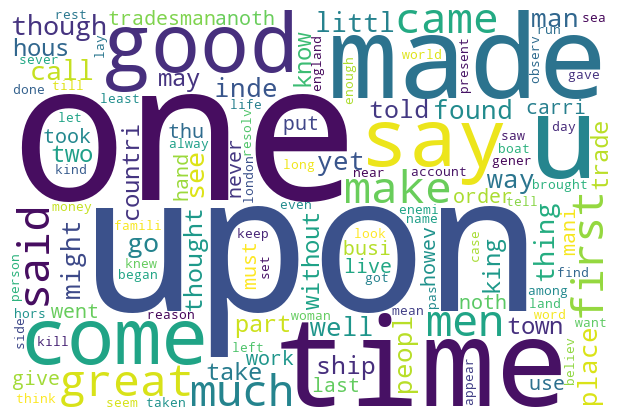

Dickens, Charles


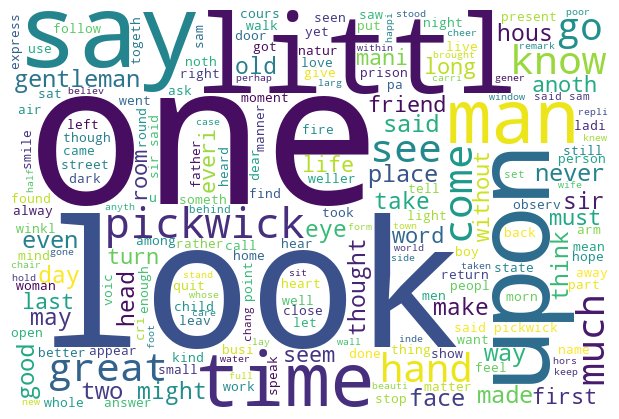

Doyle, Arthur Conan


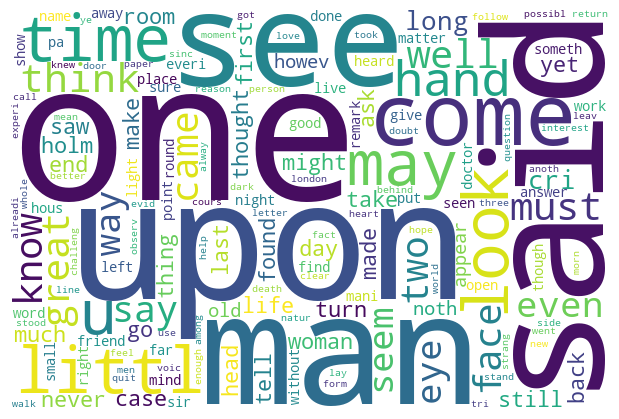

Eliot, George


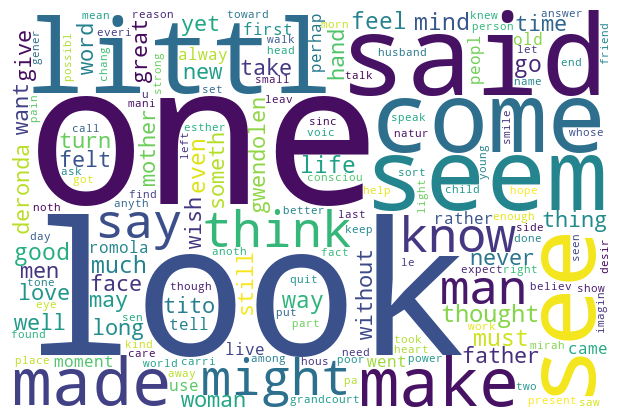

London, Jack


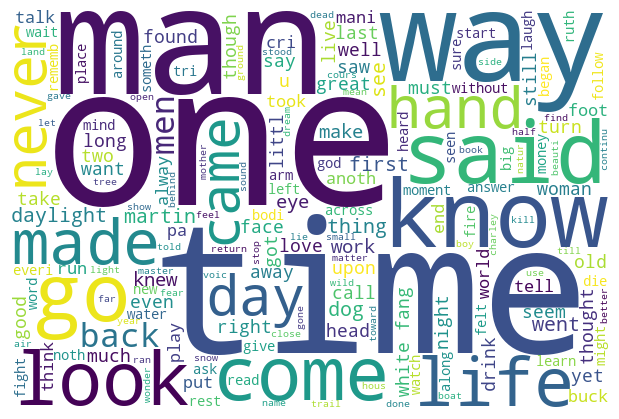

Shakespeare, William


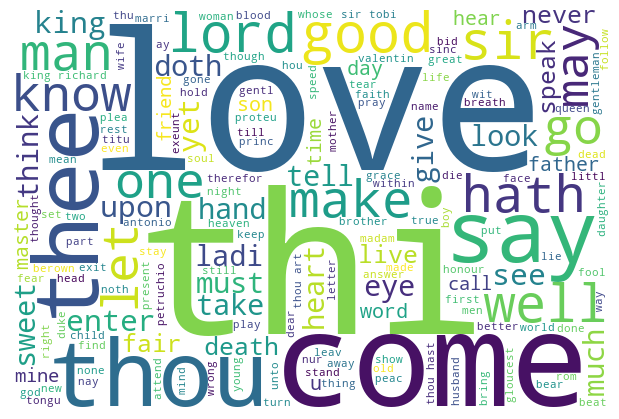

Twain, Mark


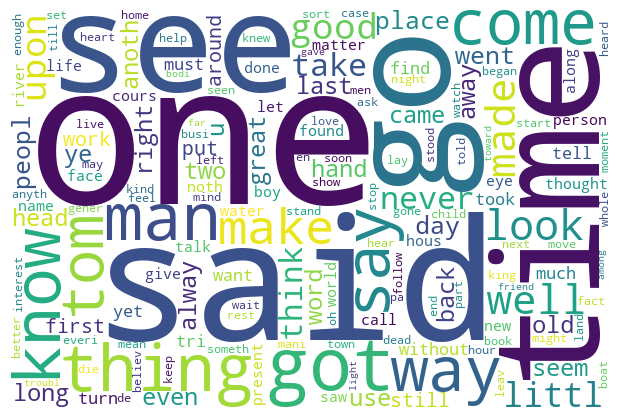

Wilde, Oscar


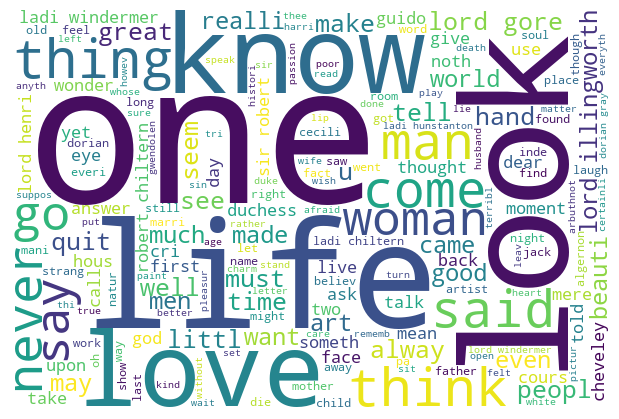

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# author_content: Dictionary, key is author (str), value is its all preprocessed contents (str)
for author, content in author_content.items():
    # Create a WordCloud object
    wordcloud = WordCloud(width=600, height=400, stopwords=None, random_state=10,
                        background_color='white', min_font_size=10).generate(content)

    # Display the WordCloud
    plt.figure(figsize=(6, 4), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(f'wordcloud/{author}.png')  # Save the WordCloud
    print(f'{author}')
    plt.show()